In [ ]:
import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.layers.core import Dense, Activation ,Flatten ,Dropout 
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.applications import imagenet_utils
import tensorflow as tf
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
train_path='/content/drive/MyDrive/senario2_224/train'
valid_path='/content/drive/MyDrive/senario2_224/valid'
test_path='/content/drive/MyDrive/senario2_224/test'
testC_path='/content/drive/MyDrive/senario2_224/testC'
testC2_path='/content/drive/MyDrive/senario2_224/testC'
IMAGE_SIZE = [224, 224]


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

In [ ]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='sigmoid')(x)


In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input


train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip= True,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    fill_mode="nearest",
                                   )

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                 rescale = 1./255
                                 )

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                            #                     color_mode='rgb',
                                                 class_mode = 'categorical',
                                                 shuffle=True
                                                 )

valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                    #        color_mode='rgb',
                                            class_mode = 'categorical',
                                            shuffle=True
                                            )
validC_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 8,
                                      #      color_mode='rgb',
                                            class_mode = 'categorical',
                                            shuffle=False)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                rescale = 1./255
                             )
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                      #    color_mode='rgb',
                                            class_mode=None,
                                            shuffle=False,
                                            batch_size = 8
                                           )


testC_set = test_datagen.flow_from_directory(testC_path,
                                            target_size = (224, 224),
                                     #     color_mode='rgb',
                                            class_mode=None,
                                             batch_size = 16,
                                            shuffle=False
                                           )


testC2_set = test_datagen.flow_from_directory(testC2_path,
                                            target_size = (224, 224),
                                     #     color_mode='rgb',
                                            class_mode=None,
                                             batch_size = 16,
                                            shuffle=False
                                           )

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 0 images belonging to 0 classes.
Found 16 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=50,
  steps_per_epoch=8,
  validation_steps=4
)

Epoch 1/50
8/8 [==============================] - 5s 255ms/step - loss: 1.3231 - accuracy: 0.4755 - val_loss: 0.7676 - val_accuracy: 0.2143
Epoch 2/50
8/8 [==============================] - 1s 146ms/step - loss: 0.5258 - accuracy: 0.7094 - val_loss: 0.4123 - val_accuracy: 0.8214
Epoch 3/50
8/8 [==============================] - 1s 147ms/step - loss: 0.4086 - accuracy: 0.8461 - val_loss: 0.3692 - val_accuracy: 0.8929
Epoch 4/50
8/8 [==============================] - 1s 147ms/step - loss: 0.4258 - accuracy: 0.8283 - val_loss: 0.3515 - val_accuracy: 0.8571
Epoch 5/50
8/8 [==============================] - 1s 145ms/step - loss: 0.3079 - accuracy: 0.9104 - val_loss: 0.3265 - val_accuracy: 0.8929
Epoch 6/50
8/8 [==============================] - 1s 146ms/step - loss: 0.2574 - accuracy: 0.8745 - val_loss: 0.3239 - val_accuracy: 0.8571
Epoch 7/50
8/8 [==============================] - 1s 145ms/step - loss: 0.1605 - accuracy: 0.9945 - val_loss: 0.3655 - val_accuracy: 0.8571
Epoch 8/50
8/8 [====

In [ ]:
model.evaluate(training_set)
model.evaluate(valid_set)
model.evaluate(testC_set)

1/1 [==============================] - 0s 146ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

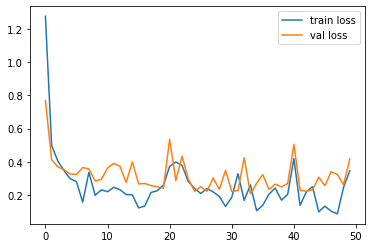

<Figure size 432x288 with 0 Axes>

In [ ]:

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


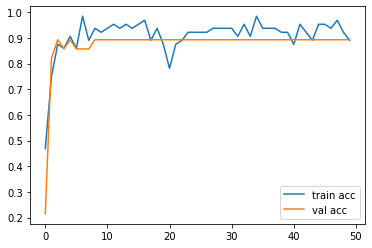

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [ ]:
import tensorflow as tf

from keras.models import load_model
modelsavedir='/content/drive/MyDrive/senario2_model/'
modelname='spill_new_sen2_model.h5'
#np.save(modelsavedir+'good1vgg16.npy',r.history)
model.save(modelsavedir+modelname)
from tensorflow.keras.models import load_model
new_model = load_model(modelsavedir+modelname)

array([[0.50519633, 0.3059739 ]], dtype=float32)

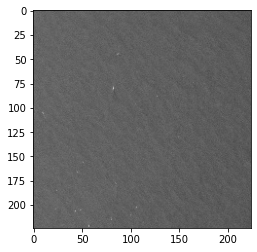

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
image = load_img('/content/drive/MyDrive/senario1_224/test/Untitled folder/20200821.jpg', target_size=(224, 224))
imgplot = plt.imshow(image)
# convert the image pixels to a numpy array.

image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model

image = preprocess_input(image)

# load the model

# predict the probability across all output classes
new_model.predict(image)

In [ ]:
import sklearn.metrics as metrics
probabilities = new_model.predict(testC_set)
probabilities
predicted_classes=np.argmax(probabilities, axis=1)
print('predited\n',predicted_classes)
true_classes = testC_set.classes
print('True\n',true_classes)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
print(confusion_matrix)
class_labels = list(testC_set.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

predited
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
True
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
[[12  0]
 [ 1  3]]
              precision    recall  f1-score   support

    notspill       0.92      1.00      0.96        12
       spill       1.00      0.75      0.86         4

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16



In [ ]:
probabilities = new_model.predict(testC2_set)
probabilities
predicted_classes=np.argmax(probabilities, axis=1)
print('predited\n',predicted_classes)
true_classes = testC2_set.classes
print('True\n',true_classes)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
print(confusion_matrix)
class_labels = list(testC2_set.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

predited
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
True
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
[[12  0]
 [ 1  3]]
              precision    recall  f1-score   support

    notspill       0.92      1.00      0.96        12
       spill       1.00      0.75      0.86         4

    accuracy                           0.94        16
   macro avg       0.96      0.88      0.91        16
weighted avg       0.94      0.94      0.93        16



In [ ]:
probabilities = new_model.predict(validC_set)
probabilities
predicted_classes=np.argmax(probabilities, axis=1)
print('predited\n',predicted_classes)
true_classes = validC_set.classes
print('True\n',true_classes)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
print(confusion_matrix)
class_labels = list(testC_set.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

predited
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
True
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
[[22  0]
 [ 3  3]]
              precision    recall  f1-score   support

    notspill       0.88      1.00      0.94        22
       spill       1.00      0.50      0.67         6

    accuracy                           0.89        28
   macro avg       0.94      0.75      0.80        28
weighted avg       0.91      0.89      0.88        28



In [ ]:
new_model.evaluate(testC_set)

1/1 [==============================] - 0s 152ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

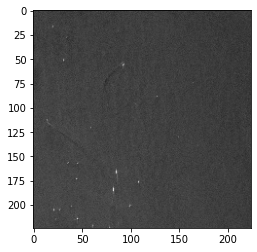

In [ ]:
import os
dir='/content/drive/MyDrive/senario1_224/test/Untitled folder/'
directory = os.fsencode(dir)

for file in os.listdir(directory):
  filename = os.fsdecode(file)
  image = load_img(dir+filename, target_size=(224, 224))
  imgplot = plt.imshow(image)
  image = img_to_array(image)
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  new_model.predict(image)